<a href="https://colab.research.google.com/github/arpitawad04/Market-Basket-Analysis-Using-Apriori-Algorithm/blob/main/Market_Basket_Analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
Data science and machine learning are very much applicable in such huge and various fields. One of them is retail business. Imagine if you are a retail business owner who owns a retail shop that sells hundreds of items. In a single month, there are more than a hundred transactions occurring in your shop, for instance. Each transaction is usually made with more than an item to be bought. It means there are usually more than an item in a single transaction.\
In the end of the month, you would like to increase the sales in your shop, so you are trying to figure out which ways is the best to create promotions or to apply discounts on particular items.

#A little about Market Basket Analysis
Well, in order to answer that, you should try one of a well-known techniques in data science and machine learning called Market Basket Analysis. Market Basket Analysis (MBA) is an accidental transaction pattern that purchasing some products will affect the purchasing of other products. MBA is used to predict what products that customer interested in . It’s a kind of knowledge discovery in data (KDD) and this technique can be applied in various fields of work .\
 The discovery of these associations can help retailers develop marketing strategies by gaining insight into which items are frequently purchased together by customers (Chauhan, 2019). By performing this techniques, we could overcome the problem that we faced before. We will find a patterns that shows which items are frequently purchased together so that we could apply a discounts into a particular items more accurately.

In [ ]:
#import required packages
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load dataset

In [ ]:
#Load the dataset
df=pd.read_excel('/content/Market_basket_Analysis_dataset.xlsx',header=None)

In [ ]:
#Have a look at first five rows of dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Exploratory Data Analysis

In [ ]:
# let's describe the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


As we can see from above output,this is a Sparse matrix having lots of NaN values.

In [ ]:
#Fill NaN values with zeroes
df.fillna(0,inplace=True)

#Check for Sparsity percentage of dataframe

In [ ]:
list_count_of_non_zeroes=[]
list_count_of_zeroes=[]
for column_name in df.columns:
    column = df[column_name]
  
    # Get the count of non-Zeros & non NaN values in column
    count_of_non_zeros = column[column != 0].count()
    list_count_of_non_zeroes.append(count_of_non_zeros)
    # Get the count of non-Zeros & non NaN values in column
    count_zeros_values = column[column == 0].count()
    list_count_of_zeroes.append(count_zeros_values)
 
print(  'Total Count of non zeros is : ',sum(list_count_of_non_zeroes))
print(  'Total Count of zeros is : ',sum(list_count_of_zeroes))

Total Count of non zeros is :  29363
Total Count of zeros is :  120657


In [ ]:
print("Sparsity in dataframe is :",sum(list_count_of_zeroes)/(sum(list_count_of_zeroes)+sum(list_count_of_non_zeroes)))

Sparsity in dataframe is : 0.8042727636315158


Around 80% of the dataframe is sparse only 20% are having values other than 0.

In [ ]:
#Find unique name of items present in whole dataframe
all_columns_unqiue_added=[]
for i in range(20):
  a=df[i].unique()
  all_columns_unqiue_added.append(a)

In [ ]:
#Convert 2D list to 1D using list comprehension
flat_list = [item for sublist in all_columns_unqiue_added for item in sublist]


In [ ]:
#Again find unique items from entire 1 D list of items obtained
all_items_list=list(set(flat_list))

In [ ]:
#Contains all items list excluding 0
all_items_list= [i for i in all_items_list if i != 0]
#all_items_list

In [ ]:
#Dictionary having key and values pair for each item,key represent index and value is item name
all_items_dict=[(k,v) for k,v in enumerate(all_items_list)]
all_items_dict

[(0, 'corn'),
 (1, 'vegetables mix'),
 (2, 'french fries'),
 (3, 'water spray'),
 (4, 'bacon'),
 (5, 'light cream'),
 (6, 'body spray'),
 (7, 'fromage blanc'),
 (8, 'french wine'),
 (9, 'escalope'),
 (10, 'tomatoes'),
 (11, 'eggplant'),
 (12, 'bug spray'),
 (13, 'meatballs'),
 (14, 'herb & pepper'),
 (15, 'frozen vegetables'),
 (16, 'nonfat milk'),
 (17, 'burgers'),
 (18, 'mayonnaise'),
 (19, 'cookies'),
 (20, 'tomato sauce'),
 (21, 'pasta'),
 (22, 'salmon'),
 (23, 'mushroom cream sauce'),
 (24, 'soda'),
 (25, 'gluten free bar'),
 (26, 'spaghetti'),
 (27, 'cottage cheese'),
 (28, 'light mayo'),
 (29, 'melons'),
 (30, 'shrimp'),
 (31, 'green grapes'),
 (32, 'cider'),
 (33, 'pet food'),
 (34, 'shampoo'),
 (35, 'strawberries'),
 (36, 'salt'),
 (37, 'blueberries'),
 (38, 'strong cheese'),
 (39, 'ground beef'),
 (40, 'dessert wine'),
 (41, 'salad'),
 (42, 'whole wheat rice'),
 (43, 'clothes accessories'),
 (44, 'chocolate bread'),
 (45, 'toothpaste'),
 (46, 'red wine'),
 (47, 'frozen smooth

In [ ]:
#Create new empty dataframe having columns as all the items 
df2=pd.DataFrame(columns=all_items_list)

In [ ]:
#Look at dataframe structure
df2.head()

,corn,vegetables mix,french fries,water spray,bacon,light cream,body spray,fromage blanc,french wine,escalope,...,chicken,extra dark chocolate,gums,parmesan cheese,whole wheat pasta,cream,carrots,whole weat flour,sparkling water,spinach


#Create dataframe by mapping each row items in their respective columns
Like 'chicken' if present in any row ,so it will be indicated as 1 in that row under 'chciken' column.

In [ ]:

for s in range(len(df)):
  m=df.iloc[s,:]
  #print(m)
  index_list=[]
  for k in m:
    if k in all_items_list:
      index=all_items_list.index(k)
      index_list.append(index)
    #print(index_list)
  n=m.isin(all_items_list)
  n=n.astype(int)
  for l,r in zip(n,index_list):
    if sum(n)>1:
      if n[l]==1:
        #print("True")
        df2.at[s,all_items_dict[r][1]]=1
     
    elif sum(n)==1:
      df2.at[s,all_items_dict[r][1]]=1
      #print("elsif True")
  


In [ ]:
#Check after mapping our new dataframe is having same number of records as original dataframe
len(df2)

7501

In [ ]:
#Only position where value is present is mapped other positions are left NaN,so fill them with zeroes
df2.fillna(0,inplace=True)

In [ ]:
df2.head()

,corn,vegetables mix,french fries,water spray,bacon,light cream,body spray,fromage blanc,french wine,escalope,...,chicken,extra dark chocolate,gums,parmesan cheese,whole wheat pasta,cream,carrots,whole weat flour,sparkling water,spinach
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Count in how many transactions 'mineral water' has occured
df2['mineral water'].sum()

1788

#Visualisation

#Lets look at Most popular Items bought in first place by customers

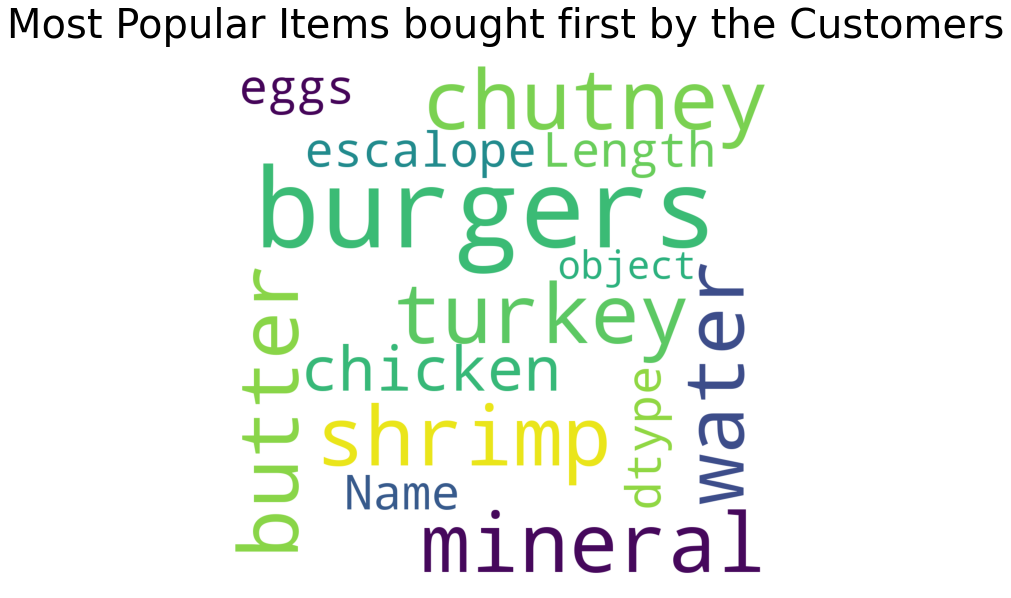

In [ ]:
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()


As we can see from the Word cloud,\
Burgers,Mineral water,Chicken,shrimp etc are most popular bought items in first place

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


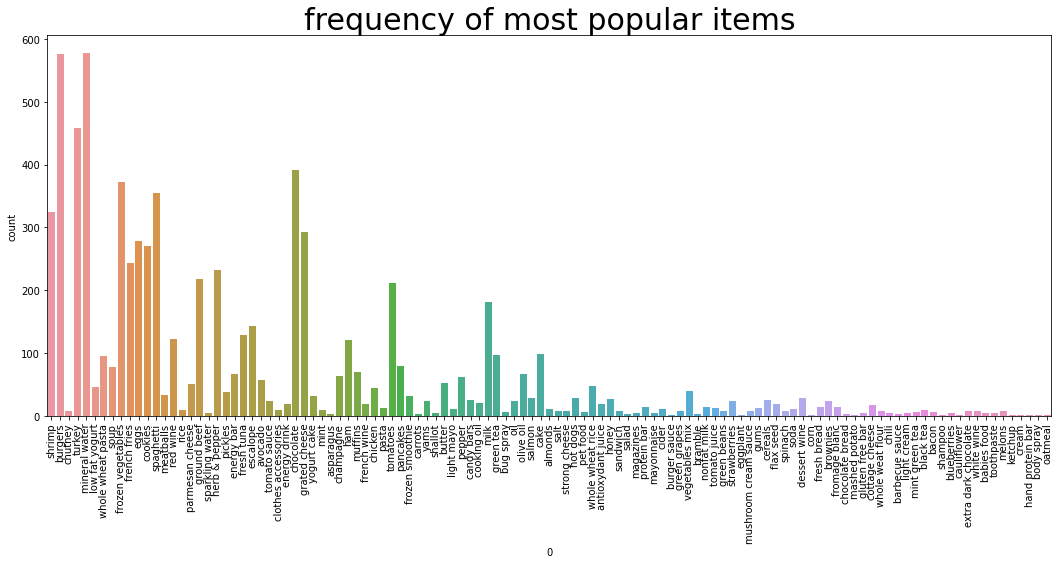

In [ ]:
# looking at the frequency of most popular items  bought in first place

plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(df[0])
plt.title('frequency of most popular items', fontsize = 30)
plt.xticks(rotation = 90 )
plt.show()

From the above plot ,it can be seen that burgers and turkey are most frequently bought first item by customers.

In [ ]:
#Count the number of values for each items in entire dataframe records and store it in list 'all_itmes_count_list'
all_items_count_list=[]
for col in df2.columns:
  a=df2[col].sum()
  all_items_count_list.append(a)


In [ ]:
all_items_count_list

[36,
 193,
 1282,
 3,
 65,
 117,
 86,
 102,
 169,
 595,
 513,
 99,
 65,
 157,
 371,
 715,
 78,
 654,
 46,
 603,
 106,
 118,
 319,
 143,
 47,
 52,
 1306,
 239,
 204,
 90,
 536,
 68,
 79,
 49,
 37,
 160,
 69,
 69,
 58,
 737,
 33,
 37,
 439,
 63,
 32,
 61,
 211,
 475,
 494,
 14,
 608,
 167,
 379,
 71,
 200,
 193,
 253,
 139,
 203,
 34,
 181,
 36,
 383,
 351,
 991,
 44,
 228,
 5,
 73,
 199,
 67,
 65,
 1229,
 33,
 153,
 972,
 356,
 45,
 469,
 323,
 124,
 39,
 46,
 243,
 199,
 86,
 107,
 1788,
 173,
 131,
 574,
 68,
 58,
 31,
 713,
 34,
 393,
 205,
 82,
 31,
 1348,
 36,
 29,
 81,
 250,
 226,
 33,
 42,
 141,
 450,
 90,
 101,
 149,
 221,
 7,
 115,
 70,
 47,
 53]

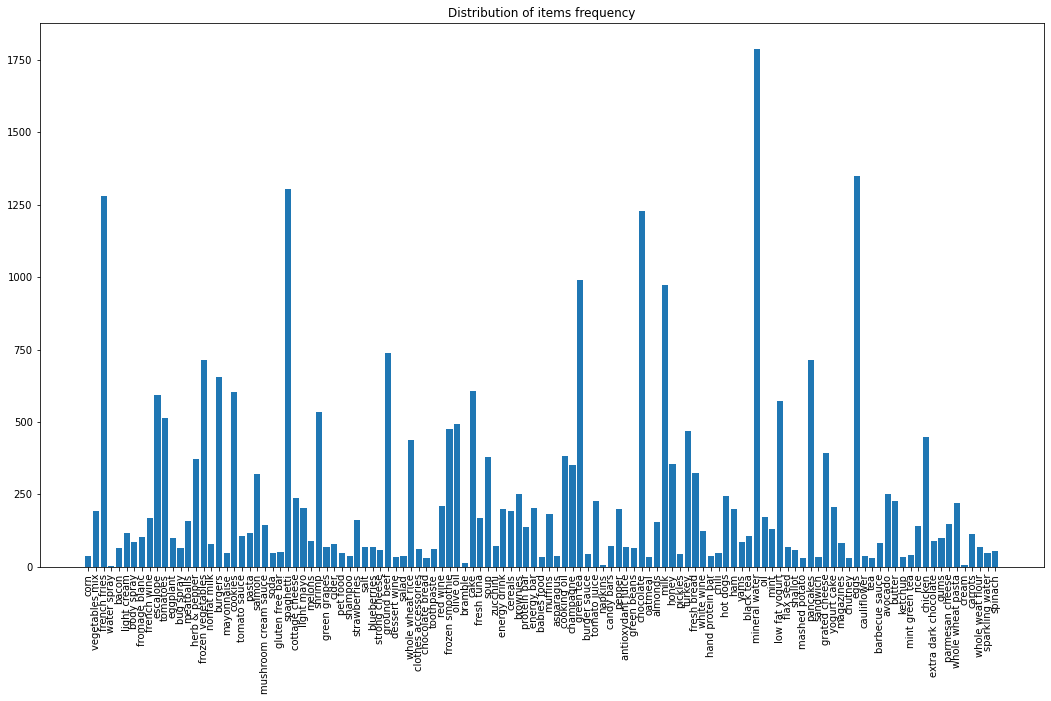

In [ ]:
#Plot the items frequency 
plt.figure(figsize=(18,10))
plt.bar(df2.columns,all_items_count_list)
plt.xticks(rotation=90)
plt.title('Distribution of items frequency')
plt.show()


In [ ]:
#Find items by counts which has appeared more than 225 times that is we are extracting 3% of the total records
b=np.array(all_items_count_list)>225


In [ ]:
#Sort items index in descending order by counts
c=np.where(b==True)
d=np.sort(c)
e=np.flip(d)

flat_list2 = [item for sublist in list(e) for item in sublist]


In [ ]:
#Find items having frequency count more than 225
df_columns_count_greater_225=df2.columns[flat_list2]
df_columns_count_greater_225

Index(['chicken', 'butter', 'avocado', 'eggs', 'grated cheese', 'pancakes',
       'low fat yogurt', 'mineral water', 'hot dogs', 'fresh bread', 'turkey',
       'honey', 'milk', 'chocolate', 'tomato juice', 'green tea', 'champagne',
       'cooking oil', 'brownies', 'soup', 'cake', 'olive oil',
       'frozen smoothie', 'whole wheat rice', 'ground beef', 'shrimp',
       'cottage cheese', 'spaghetti', 'salmon', 'cookies', 'burgers',
       'frozen vegetables', 'herb & pepper', 'tomatoes', 'escalope',
       'french fries'],
      dtype='object')

In [ ]:
#Define function to find frequency count of items using indices obtained from flat_list2 having count more than 225
def findElements(lst1, lst2):
    return [lst1[i] for i in lst2]
count_items_greater_than_225=findElements(all_items_count_list,flat_list2)

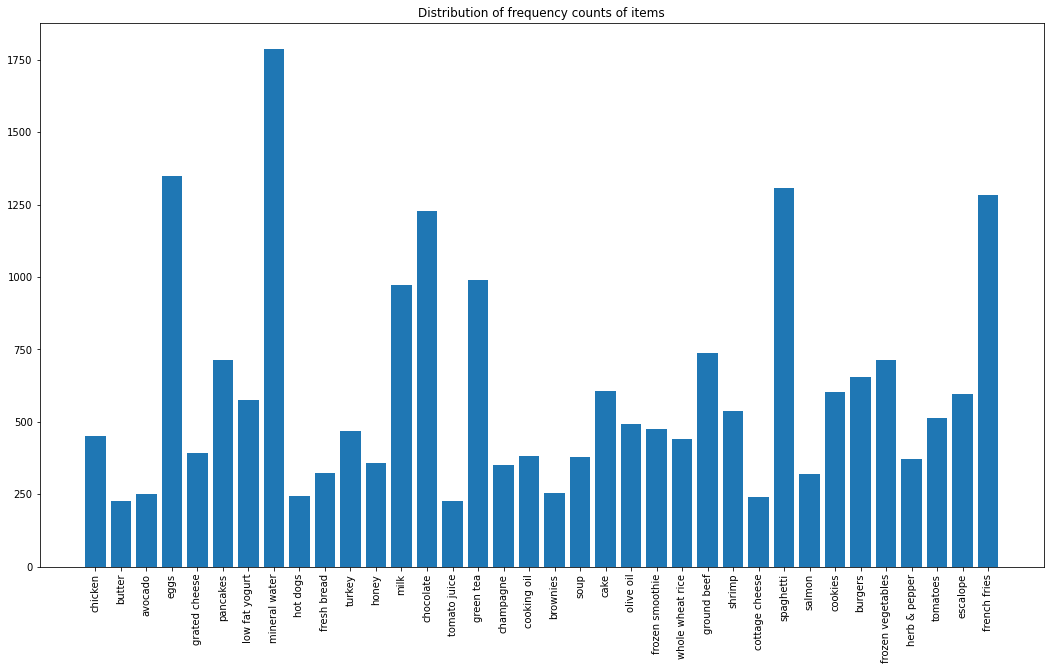

In [ ]:
plt.figure(figsize=(18,10))
plt.bar(df_columns_count_greater_225,count_items_greater_than_225)
plt.xticks(rotation=90)
plt.title('Distribution of frequency counts of items')
plt.show()

#Market Basket Analysis


# Filter The Transaction : Bought More Than 1 Items Only
In market basket analysis, we are going to uncover the association between 2 or more items that is bought according to historical data. So, it is less useful if a transaction only bought a single items. I mean, how could we uncover the association between 2 or more items if there is only 1 item bought? Hence, the next step is to filter out the transactions that is bought more than 1 item. bold text

In [ ]:
df_bought_more_than_1=df2[(df2>0).sum(axis=1)>=2]

In [ ]:
len(df_bought_more_than_1)

5747

#Association Rules
Given a set of transactions, find rules that will predict the occurrence of an item based on the occurrences of other items in the transaction. For example, we can extract information on purchasing behavior like “ If someone buys beer and sausage, then is likely to buy mustard with high probability “\
Let’s define the main Associaton Rules:
#Support
It calculates how often the product is purchased .
#Confidence
It measures how often items in Y appear in transactions that contain X.
#Lift
It is the value that tells us how likely item Y is bought together with item X. Values greater than one indicate that the items are likely to be purchased together. It tells us how much better a rule is at predicting the result than just assuming the result in the first place. When lift > 1 then the rule is better at predicting the result than guessing. When lift < 1, the rule is doing worse than informed guessing.

#Apply the Apriori Algorithm

In applying the apriori algorithm, first you have to install the library called “mlxtend”. You can just simply type “pip install mlxtend” and you’re ready to go! After install the packages, here’s how I apply the Apriori Algorithm.

In [ ]:
#Import required packages
from mlxtend.frequent_patterns import association_rules, apriori


# Apriori Model-1

In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 0.1% out of the whole transaction, it means I will give the support value of 0.001.

In [ ]:
# compute frequent items using the Apriori algorithm - Get only one item
frequent_itemsets = apriori(df_bought_more_than_1, min_support = 0.001, use_colnames=True)
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
frequent_itemsets.head()

,support,itemsets
0,0.006090,(corn)
1,0.031321,(vegetables mix)
2,0.200104,(french fries)
3,0.011136,(bacon)
4,0.020010,(light cream)


We can see that muushroom cream sauce has support value of 0.24013,mineral water has value of 0.294936 etc .

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(corn),(tomatoes),0.006090,0.085958,0.001392,0.228571,2.659109,0.000869,1.184869
1,(tomatoes),(corn),0.085958,0.006090,0.001392,0.016194,2.659109,0.000869,1.010271
2,(corn),(frozen vegetables),0.006090,0.121107,0.001044,0.171429,1.415517,0.000306,1.060733
3,(frozen vegetables),(corn),0.121107,0.006090,0.001044,0.008621,1.415517,0.000306,1.002553
4,(corn),(burgers),0.006090,0.110318,0.001566,0.257143,2.330915,0.000894,1.197648


From the above output,we can interpret that if a person is buying 'mushroom cream suace' then the same person is more likely to buy 'spaghetti' as value of lift more than 1.\
One thing to notice ,confidence of person buying 'spaghetti' given he has bought 'mushroom cream sauce ' is 0.231884 which is higher than its opposite scenerio of person buying 'mushroom cream sauce' given he has bought 'spaghetti' .\
Therefore sales of 'spaghetti' could increase due to purchase of 'mushroom cream sauce' but vice versa is not true.

In [ ]:
rules[rules['antecedents']==frozenset({'mushroom cream sauce'})].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33552,(mushroom cream sauce),"(french fries, escalope, pasta)",0.024013,0.002088,0.001392,0.057971,27.763285,0.001342,1.059322
9037,(mushroom cream sauce),"(escalope, pasta)",0.024013,0.007656,0.003306,0.137681,17.983037,0.003122,1.150785
5294,(mushroom cream sauce),"(french fries, pasta)",0.024013,0.004002,0.001392,0.057971,14.485192,0.001296,1.057290
9097,(mushroom cream sauce),"(fresh bread, escalope)",0.024013,0.004698,0.001044,0.043478,9.254428,0.000931,1.040543
1294,(mushroom cream sauce),(pasta),0.024013,0.018792,0.003480,0.144928,7.712024,0.003029,1.147514
39662,(mushroom cream sauce),"(spaghetti, chocolate, escalope)",0.024013,0.005742,0.001044,0.043478,7.571805,0.000906,1.039451
9079,(mushroom cream sauce),"(spaghetti, escalope)",0.024013,0.018270,0.002262,0.094203,5.156039,0.001823,1.083829
4437,(mushroom cream sauce),"(french fries, escalope)",0.024013,0.021402,0.002610,0.108696,5.078650,0.002096,1.097939
9085,(mushroom cream sauce),"(green tea, escalope)",0.024013,0.011658,0.001392,0.057971,4.972529,0.001112,1.049163
5389,(mushroom cream sauce),"(shrimp, french fries)",0.024013,0.013050,0.001218,0.050725,3.886860,0.000905,1.039687


If we only focus on 'mushroom cream sauce' which items is most likely to be bought ,so on the basis of lift values (pasta, escalope, french fries) has highest lift.
Therefore if a customer is buying 'mushroom creeam sauce',he should be recommended the set of (pasta, escalope, french fries) as it is most likely to be purchased.

Find items to be recommended if customer has already bought 2 items:

In [ ]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
35852,"(shallot, french fries)","(cookies, low fat yogurt)",0.003480,0.006960,0.001218,0.350000,50.286250,0.001194,1.527754,2
35857,"(cookies, low fat yogurt)","(shallot, french fries)",0.006960,0.003480,0.001218,0.175000,50.286250,0.001194,1.207903,2
67309,"(ground beef, rice)","(herb & pepper, mineral water, grated cheese)",0.005742,0.003654,0.001044,0.181818,49.757576,0.001023,1.217756,2
67304,"(herb & pepper, mineral water, grated cheese)","(ground beef, rice)",0.003654,0.005742,0.001044,0.285714,49.757576,0.001023,1.391961,3
35851,"(french fries, cookies, low fat yogurt)",(shallot),0.002610,0.009396,0.001218,0.466667,49.665432,0.001194,1.857382,3


From the above result,we can observe that for customer who has bought atleast 2 items,then the lift value is 50.2865 for purchasing 'cooking','low fat yogurt' if he has purchased first 2 items 'shallot','french fries'.

#Apriori Model-2

In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 0.1% out of the whole transaction, it means I will give the support value of 0.001 and max_len=3,which means antecedents we are setting 3.

In [ ]:
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets2 = apriori(df_bought_more_than_1, min_support = 0.001, max_len = 3, use_colnames=True)
# compute all association rules for frequent_itemsets
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

In [ ]:
frequent_itemsets2.head()

,support,itemsets
0,0.006090,(corn)
1,0.031321,(vegetables mix)
2,0.200104,(french fries)
3,0.011136,(bacon)
4,0.020010,(light cream)


In [ ]:
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(corn),(tomatoes),0.006090,0.085958,0.001392,0.228571,2.659109,0.000869,1.184869
1,(tomatoes),(corn),0.085958,0.006090,0.001392,0.016194,2.659109,0.000869,1.010271
2,(corn),(frozen vegetables),0.006090,0.121107,0.001044,0.171429,1.415517,0.000306,1.060733
3,(frozen vegetables),(corn),0.121107,0.006090,0.001044,0.008621,1.415517,0.000306,1.002553
4,(corn),(burgers),0.006090,0.110318,0.001566,0.257143,2.330915,0.000894,1.197648


From the above output,we can interpret that if a person is buying 'corn' then the same person is more likely to buy 'tomatoes' as value of lift more than 1.
One thing to notice ,confidence of person buying 'tomatoes' given he has bought 'corn' is 0.228571 which is higher than its opposite scenerio of person buying 'corn' given he has bought 'tomatoes' .
Therefore sales of 'tomatoes' could increase due to purchase of 'corn' but vice versa is not true.

In [ ]:
rules2['lhs items'] = rules2['antecedents'].apply(lambda x:len(x) )
rules2[rules2['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
7910,"(extra dark chocolate, cooking oil)",(light cream),0.002088,0.020010,0.001044,0.500000,24.986957,0.001002,1.959979,2
18074,"(cookies, low fat yogurt)",(shallot),0.006960,0.009396,0.001566,0.225000,23.945833,0.001501,1.278198,2
9034,"(escalope, mushroom cream sauce)",(pasta),0.007482,0.018792,0.003306,0.441860,23.512705,0.003165,1.757997,2
8172,"(fresh tuna, honey)",(fromage blanc),0.005220,0.017400,0.002088,0.400000,22.988000,0.001997,1.637666,2
7909,"(light cream, cooking oil)",(extra dark chocolate),0.003654,0.015138,0.001044,0.285714,18.873563,0.000989,1.378806,2


From the above result,we can observe that for customer who has bought atleast 2 items,then the lift value is 24.987 for purchasing 'light cream' if he has purchased first 2 items 'extra dark chocolate', 'cooking oil'.

#Apriori Model-3

In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 1% out of the whole transaction, it means I will give the support value of 0.03 and max_len=3,which means antecedents we are setting 3.

In [ ]:
# compute frequent items using the Apriori algorithm - Get up to three items
frequent_itemsets3 = apriori(df_bought_more_than_1, min_support = 0.01, max_len = 3, use_colnames=True)
# compute all association rules for frequent_itemsets
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)

In [ ]:
frequent_itemsets3.head()

,support,itemsets
0,0.031321,(vegetables mix)
1,0.200104,(french fries)
2,0.011136,(bacon)
3,0.020010,(light cream)
4,0.014964,(body spray)


In [ ]:
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(vegetables mix),(mineral water),0.031321,0.294936,0.010266,0.327778,1.111350,0.001029,1.048855
1,(mineral water),(vegetables mix),0.294936,0.031321,0.010266,0.034808,1.111350,0.001029,1.003613
2,(french fries),(escalope),0.200104,0.085958,0.021402,0.106957,1.244290,0.004202,1.023514
3,(escalope),(french fries),0.085958,0.200104,0.021402,0.248988,1.244290,0.004202,1.065090
4,(frozen vegetables),(french fries),0.121107,0.200104,0.024883,0.205460,1.026763,0.000649,1.006740


From the above output,we can interpret that if a person is buying 'vegetables mix' then the same person is more likely to buy 'mineral water' as value of lift more than 1. \
One thing to notice ,confidence of person buying 'mineral water' given he has bought 'vegetables mix' is 0.327778 which is higher than its opposite scenerio of person buying 'vegetables mix' given he has bought 'mineral water' . Therefore sales of 'mineral water' could increase due to purchase of 'vegetables mix' but vice versa is not true.

In [ ]:
rules3['lhs items'] = rules3['antecedents'].apply(lambda x:len(x) )
rules3[rules3['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
602,"(milk, mineral water)",(soup),0.062641,0.064555,0.011136,0.177778,2.753878,0.007092,1.137703,2
426,"(frozen vegetables, spaghetti)",(ground beef),0.036367,0.124587,0.011310,0.311005,2.496291,0.006779,1.270565,2
427,"(frozen vegetables, ground beef)",(spaghetti),0.022098,0.218201,0.011310,0.511811,2.345596,0.006488,1.601427,2
502,"(spaghetti, mineral water)",(ground beef),0.077954,0.124587,0.022272,0.285714,2.293296,0.012560,1.225579,2
604,"(mineral water, soup)",(milk),0.030103,0.163390,0.011136,0.369942,2.264172,0.006218,1.327831,2


From the above result,we can observe that for customer who has bought atleast 2 items,then the lift value is 2.7539 for purchasing 'soup' if he has purchased first 2 items 'milk', 'mineral water'.

#Conclusion/Findings:
The result of this market basket analysis could be used for a data-driven marketing strategy and decision making. In this datasets, we could generates several business insights as follows :\
#Item Placements:
We could put (extra dark chocolate, cooking oil) and (light cream) in a closer place, maybe in a same shelf or any other closer place.
#Products Bundling:
 We could put (extra dark chocolate, cooking oil) and (light cream) as a single bundle of product with a lower price compare to each price combined. This way will attract more sales and generates more income.

